# K-Means Machine Learning Algorithm
Create the K-Means algorithm using only the tools in numpy and pandas.  
The purpose of this exercise is to demonstrate and explain the algorithm; otherwise there are powerful built-in functions in Python's sklearn package to handle this task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Initialization

### Data Points
We will need data.  The following data will help us demonstrate the algorithm

In [2]:
# Create Points to cluster
Points = pd.DataFrame()
Points.loc[:,0] = [1.91,0.9,1.26,0.61,1.25,1.04,0.53,0.99,1.11,0.1,-0.15,0.83,0.72,0.69,0.74,
      0.72,1.09,0.68,0.67,0.82,0.74,0.94,0.64,1.44,0.76,1.06,0.79,0.88,0.76,0.85,
      0.88,0.75,0.83,0.85,0.35,0.63,-0.14,-0.04,0.3,-0.52,-0.27,-0.32,-0.08,-0.39,
      -0.06,0.09,-0.51,-0.22,-0.03,-0.12,0.01,-0.21,-0.21,0.37,1.18,0,0,-0.66,-0.1,
      1.01,1.19,-0.3,-2.2,-1.82,-1.33,-0.84,-2.17,-1.67,-1.38,-1.39,-1.32,-1.49,
      -2.16,-1.64,-1.44,-1.58,-1.53,-1.53,-0.27,-1.32,-0.89,-0.33,-1.29]
Points.loc[:,1] = [1.43,0.79,0.52,1.55,0.66,0.62,1.33,1.27,1.04,2.41,1.83,1.02,1.17,0.97,0.91,
      0.14,0.53,1.15,0.96,0.87,0.27,-0.15,0.82,0.72,0.84,1.52,0.93,0.91,0.87,0.93,
      0.97,1,0.86,0.88,0.55,-1.99,-0.78,-0.32,0.67,-1.75,-0.7,-0.51,-0.37,-0.55,
      -0.42,-0.48,0.64,-0.49,-0.51,-0.32,-0.48,-0.57,-0.32,-0.28,-1.51,-0.41,-0.44,
      -2.27,-0.67,-0.32,0.43,-1.26,-1.85,-0.16,-0.89,0.05,-0.38,-0.53,-1.75,-0.98,
      -0.33,-1.41,-1.33,-0.9,-0.72,-0.77,-0.66,-0.81,-0.87,-0.94,-1.73,0.55,-0.7]
Points.head()

,0,1
0,1.91,1.43
1,0.90,0.79
2,1.26,0.52
3,0.61,1.55
4,1.25,0.66


### Initial cluster Guesses
We need to specify the number of clusters, which will be three.  
We need to place the initial centroids (clusters) somewhere in the space.

In [3]:
# Create initial cluster centroids
ClusterCentroidGuesses = pd.DataFrame()
ClusterCentroidGuesses.loc[:,0] = [-1, 1, 0] # the x-values of the three clusters
ClusterCentroidGuesses.loc[:,1] = [2, -2, 0] # the y-values of the three clusters
ClusterCentroidGuesses

,0,1
0,-1,2
1,1,-2
2,0,0


### Let's visualize the points and the initial guesses
Do you think we did a good job with this initialization?

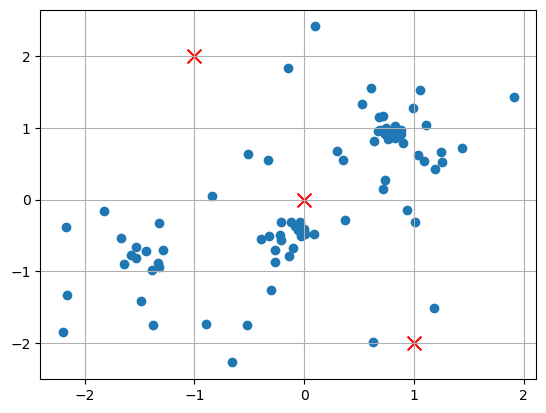

In [4]:
plt.scatter(Points.loc[:,0], Points.loc[:,1])
plt.scatter(ClusterCentroidGuesses.loc[:,0], ClusterCentroidGuesses.loc[:,1], marker='x', color='red', s=100)
plt.grid()
plt.show()

### Label Points by Proximity to Centroid
- For each point determine the distances to each centroid
- Label each point with the centroid that is closest

In [5]:
def FindLabelOfClosest(Points, ClusterCentroids): # determine Labels from Points and ClusterCentroids
    NumberOfClusters, NumberOfDimensions = ClusterCentroids.shape # dimensions of the initial Centroids
    Distances = np.array([float('inf')]*NumberOfClusters) # centroid distances
    NumberOfPoints, NumberOfDimensions = Points.shape
    Labels = np.array([-1]*NumberOfPoints)
    for PointNumber in range(NumberOfPoints): # assign labels to all data points            
        for ClusterNumber in range(NumberOfClusters): # for each cluster
            # Get distances for each cluster
            Distances[ClusterNumber] = np.sqrt(sum((Points.loc[PointNumber,:] - ClusterCentroids.loc[ClusterNumber,:])**2))                
        Labels[PointNumber] = np.argmin(Distances) # assign to closest cluster
    return Labels # return the a label for each point

### Determine Centroid of Cluster
- Re-calculate the centroids based on the (new) labeled points  
- Each centroid is the average of the points from one cluster 

In [6]:
def CalculateClusterCentroid(Points, Labels): # determine centroid of Points with the same label
    ClusterLabels = np.unique(Labels) # names of labels
    NumberOfPoints, NumberOfDimensions = Points.shape
    ClusterCentroids = pd.DataFrame(np.array([[float('nan')]*NumberOfDimensions]*len(ClusterLabels)))
    for ClusterNumber in ClusterLabels: # for each cluster
        # get mean for each label 
        ClusterCentroids.loc[ClusterNumber, :] = np.mean(Points.loc[ClusterNumber == Labels, :])
    return ClusterCentroids # return the a label for each point

## K-Means
Combine Labeling and Centroid Calculation

### Exercise:
Replace the two statements (`print("Replace this line with code")`) with the proper code.

In [15]:
def KMeans(Points, ClusterCentroidGuesses):
    ClusterCentroids = ClusterCentroidGuesses.copy()
    Labels_Previous = None
    # Get starting set of labels
    Labels = FindLabelOfClosest(Points, ClusterCentroids)
    while not np.array_equal(Labels, Labels_Previous):
        # Re-calculate cluster centers based on new set of labels
        NewCentroids = CalculateClusterCentroid(Points,Labels)
        # print(" Replace this line with code")
        Labels_Previous = Labels.copy() # Must make a deep copy
        # Determine new labels based on new cluster centers
        Labels = FindLabelOfClosest(Points,NewCentroids)
        # print(" Replace this line with code")
    return Labels, ClusterCentroids

### Execute K-Means

In [16]:
# Run K-Means on the sample data
Labels, ClusterCentroids = KMeans(Points, ClusterCentroidGuesses)

### Visualize Result
Plot labeled points and centroids

In [9]:
def Plot2DKMeans(Points, Labels, ClusterCentroids, Title):
    for LabelNumber in range(max(Labels)+1):
        LabelFlag = Labels == LabelNumber
        color =  ['c', 'm', 'y', 'b', 'g', 'r', 'c', 'm', 'y', 'b', 'g', 'r', 'c', 'm', 'y'][LabelNumber]
        marker = ['s', 'o', 'v', '^', '<', '>', '8', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'][LabelNumber]
        plt.scatter(Points.loc[LabelFlag,0], Points.loc[LabelFlag,1],
                    s= 100, c=color, edgecolors="black", alpha=0.3, marker=marker)
        plt.scatter(ClusterCentroids.loc[LabelNumber,0], ClusterCentroids.loc[LabelNumber,1], s=200, c="black", marker=marker)
    plt.title(Title)
    plt.show()

In [10]:
# Change the plot dimensions
plt.rcParams["figure.figsize"] = [8, 8] # Square
# plt.rcParams["figure.figsize"] = [8, 0.5] # Wide
# plt.rcParams["figure.figsize"] = [0.5, 8] # Tall

In [14]:
Labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1])

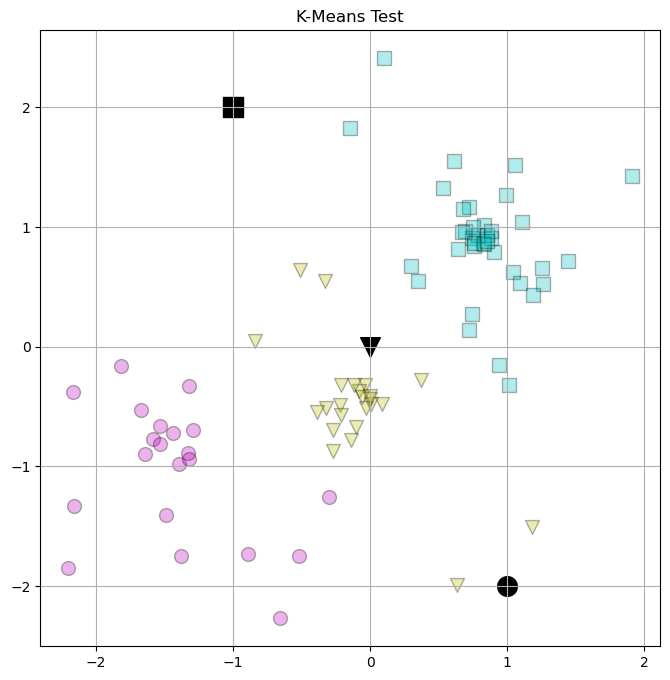

In [17]:
# Visualize the results of the K-Means clustering
Title = 'K-Means Test'
plt.grid()
Plot2DKMeans(Points, Labels, ClusterCentroids, Title)